<a href="https://colab.research.google.com/github/EricYangXD/Colab4Coursera/blob/master/COURSERA_Introduction_to_TensorFlow_for_AI%2CML%2CDL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## COURSERA Introduction to TensorFlow for AI,ML,DL

In [0]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [0]:
model=keras.Sequential([keras.layers.Dense(units=1,input_shape=[1])])

In [0]:
model.compile(optimizer='sgd',loss='mean_squared_error')

In [0]:
xs=np.array([-1.0,0.0,1.0,2.0,3.0,4.0],dtype=float)
ys=np.array([-3.0,-1.0,1.0,3.0,5.0,7.0],dtype=float)

In [0]:
model.fit(xs,ys,epochs=500)

In [0]:
print(model.predict([10.0]))

###Exercise 

In [0]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
model = keras.Sequential([keras.layers.Dense(units=1,input_shape=[1])])
model.compile(optimizer='sgd',loss='mean_squared_error')
xs = np.array([1.0,2.0,3.0,4.0,5.0,6.0],dtype=float)
ys = np.array([10.0,15.0,20.0,25.0,30.0,35.0],dtype=float)
model.fit(xs,ys,epochs=500)
print(model.predict([7.0]))


In [0]:
import tensorflow as tf
print(tf.__version__)

In [0]:
mnist=tf.keras.datasets.fashion_mnist

In [0]:
(training_images,training_labels),(test_images,test_labels)=mnist.load_data()

In [0]:
# 控制训练精度
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.4):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [0]:
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

In [0]:
training_images=training_images/255.0
test_images=test_images/255.0

In [0]:
model=tf.keras.Sequential([tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(128,activation=tf.nn.relu),
                           tf.keras.layers.Dense(10,activation=tf.nn.softmax)])

In [0]:
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(training_images,training_labels,epochs=5)#   ,callbacks=[callback]

In [0]:
model.evaluate(test_images,test_labels)

In [0]:
classifications=model.predict(test_images)
print(classifications[0])

In [0]:
print(test_labels[0])

### Exercise

In [5]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()

x_train=x_train/255.0
x_test=x_test/255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),#
#     tf.keras.layers.Dense(512,activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),#再加一层神经网络
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# 打印卷积、池化过程的详细信息
model.summary()

model.fit(x_train,y_train,epochs=5,callbacks=[callbacks])

model.evaluate(x_test,y_test)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
60000/60000 [==============================] - 8s 135us/sample - loss: 0.2556 - acc: 0.9276
Epoch 2/5
60000/60000 [==============================] - 8s 133us/sample - loss: 0.1135 - acc: 0.9657
Epoch 3/5
60000/60000 [==============================] - 8s 130us/sample - loss: 0.0784 - acc: 0.9762
Epoch 4/5
60000/60000 [==============================] - 8s 131us/sample - loss: 0.0592 - acc:

[0.0768700412520906, 0.9764]

# Exercise 3

In [1]:
import tensorflow as tf

excepted_acc=0.998
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>excepted_acc):
      print("\nReached 99.8% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)

training_images=training_images / 255.0
test_images=test_images / 255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax) # activation='softmax'
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


model.fit(training_images, training_labels, epochs=15,callbacks=[callbacks])

model.evaluate(test_images, test_labels)



4423680/4422102 [==============================] - 0s 0us/step
Instructions for updating:
Colocations handled automatically by placer.
Epoch 1/15
60000/60000 [==============================] - 12s 200us/sample - loss: 0.3929 - acc: 0.8619
Epoch 2/15
60000/60000 [==============================] - 11s 184us/sample - loss: 0.2640 - acc: 0.9044
Epoch 3/15
60000/60000 [==============================] - 11s 184us/sample - loss: 0.2168 - acc: 0.9208
Epoch 4/15
60000/60000 [==============================] - 11s 183us/sample - loss: 0.1857 - acc: 0.9319
Epoch 5/15
60000/60000 [==============================] - 11s 184us/sample - loss: 0.1590 - acc: 0.9420
Epoch 6/15
60000/60000 [==============================] - 11s 183us/sample - loss: 0.1336 - acc: 0.9510
Epoch 7/15
60000/60000 [==============================] - 11s 183us/sample - loss: 0.1122 - acc: 0.9590
Epoch 8/15
60000/60000 [==============================] - 11s 183us/sample - loss: 0.0936 - acc: 0.9664
Epoch 9/15
60000/60000 [=========

[0.4322596383626573, 0.909]

## Improving Computer Vision Accuracy using Convolutions

In [6]:
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

# You'll notice that there's a bit of a change here in that the training data needed to be reshaped. 
# That's because the first convolution expects a single tensor containing everything, 
# so instead of 60,000 28x28x1 items in a list, we have a single 4D list that is 60,000x28x28x1, 
# and the same for the test images. If you don't do this, 
# you'll get an error when training as the Convolutions do not recognize the shape.
training_images=training_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)

training_images=training_images / 255.0
test_images=test_images / 255.0

model = tf.keras.models.Sequential([
  # 卷积
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  # 池化
  tf.keras.layers.MaxPooling2D(2, 2),
  # 卷积
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  # 池化
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax) # activation='softmax'
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 输出卷积池化过程
model.summary()

model.fit(training_images, training_labels, epochs=5,callbacks=[callbacks])



4423680/4422102 [==============================] - 0s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_9 (Dens

In [8]:
test_loss = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 5s 489us/sample - loss: 0.2552 - acc: 0.9060


## Visualizing the Convolutions and Pooling

In [15]:
print(test_labels[:30])#打印出前30个标签

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3]


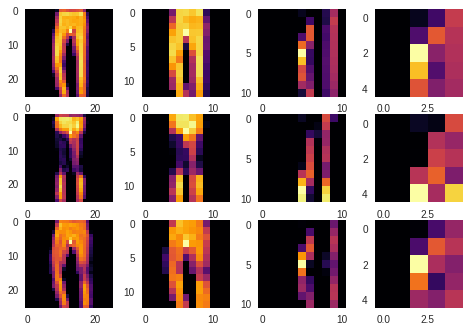

In [29]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
# 选择不同的标签，改变卷积次数，查看图片，就能看出卷积的效果
FIRST_IMAGE=2
SECOND_IMAGE=3
THIRD_IMAGE=5
CONVOLUTION_NUMBER = 5#卷积次数
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

In [33]:
import tensorflow as tf
print(tf.__version__)

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.97):
      print("\nReached 97% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5,callbacks=[callbacks])
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

1.13.1
Epoch 1/5
60000/60000 [==============================] - 34s 572us/sample - loss: 0.1714 - acc: 0.9496
Epoch 2/5
59936/60000 [============================>.] - ETA: 0s - loss: 0.0593 - acc: 0.9818
Reached 97% accuracy so cancelling training!
10000/10000 [==============================] - 2s 233us/sample - loss: 0.0608 - acc: 0.9795
0.9795


## exercise

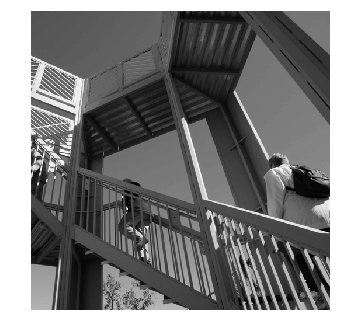

In [36]:
import cv2
import numpy as np
from scipy import misc
i=misc.ascent()

import matplotlib.pyplot as plt
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i)
plt.show()

In [0]:
i_transformed=np.copy(i)
size_x=i_transformed.shape[0]
size_y=i_transformed.shape[1]


In [0]:
# This filter detects edges nicely
# It creates a convolution that only passes through sharp edges and straight
# lines.

#Experiment with different values for fun effects.
# filter=[[0,1,0],[1,-4,1],[0,1,0]]
# A couple more filters to try for fun!
filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
#filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]

# If all the digits in the filter don't add up to 0 or 1, you 
# should probably do a weight to get it to do so
# so, for example, if your weights are 1,1,1 1,2,1 1,1,1
# They add up to 10, so you would set a weight of .1 if you want to normalize them
weight  = 1

In [0]:
for x in range(1,size_x-1):
  for y in range(1,size_y-1):
    convolution=0.0
    convolution=convolution+(i[x-1,y-1]*filter[0][0])
    convolution=convolution+(i[x,y-1]*filter[0][1])    
    convolution=convolution+(i[x+1,y-1]*filter[0][2])  
    
    convolution=convolution+(i[x-1,y]*filter[1][0])    
    convolution=convolution+(i[x,y]*filter[1][1])    
    convolution=convolution+(i[x+1,y-1]*filter[1][2])  
    
    convolution=convolution+(i[x-1,y+1]*filter[2][0])    
    convolution=convolution+(i[x,y+1]*filter[2][1])    
    convolution=convolution+(i[x+1,y+1]*filter[2][2])  
    
    convolution=convolution*weight
    
    if(convolution<0):
      convolution=0
    if(convolution>255):
      convolution=255
      
    i_transformed[x,y]=convolution
      

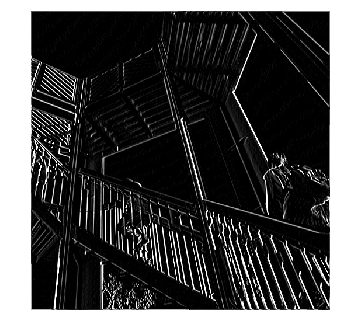

In [46]:
plt.gray()
plt.grid(False)
plt.imshow(i_transformed)
plt.axis('off')
plt.show()

In [0]:
new_x=int(size_x/2)
new_y=int(size_y/2)
newImage=np.zeros((new_x,new_y))
for x in range(0,size_x,2):
  for y in range(0,size_y,2):
    pixels=[]
    pixels.append(i_transformed[x,y])
    pixels.append(i_transformed[x+1,y])  
    pixels.append(i_transformed[x,y+1])
    pixels.append(i_transformed[x+1,y+1])
    pixels.sort(reverse=True)
    newImage[int(x/2),int(y/2)]=pixels[0]

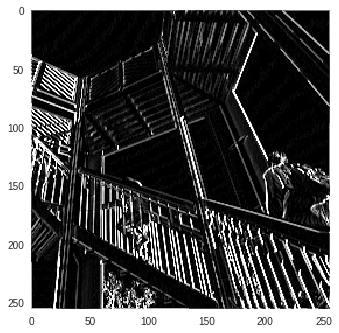

In [50]:
plt.gray()
plt.grid(False)
plt.imshow(newImage)
plt.show()

## Exercise week4

In [51]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2019-03-08 08:03:33--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 2607:f8b0:400e:c08::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M  78.6MB/s    in 1.8s    

2019-03-08 08:03:35 (78.6 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [0]:
import os
import zipfile

local_zip='/tmp/horse-or-human.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()

In [0]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

In [54]:
train_horse_names=os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names=os.listdir(train_human_dir)
print(train_human_names[:10])

['horse33-5.png', 'horse29-4.png', 'horse34-2.png', 'horse29-3.png', 'horse19-3.png', 'horse01-6.png', 'horse44-1.png', 'horse41-5.png', 'horse40-9.png', 'horse49-9.png']
['human06-24.png', 'human11-13.png', 'human07-26.png', 'human13-03.png', 'human10-11.png', 'human13-16.png', 'human04-01.png', 'human05-02.png', 'human13-13.png', 'human06-25.png']


In [55]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

total training horse images: 500
total training human images: 527


In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows=4
ncols=4

# Index for iterating over images
pic_index=0

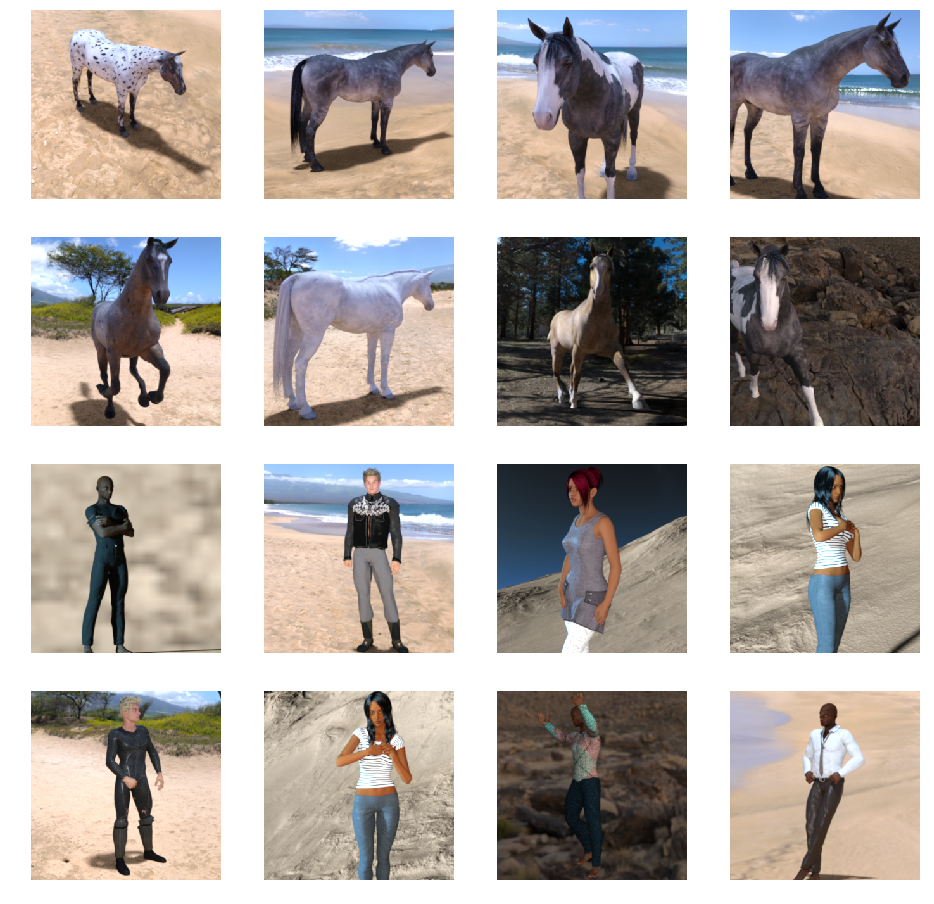

In [59]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig=plt.gcf()
fig.set_size_inches(ncols*4,nrows*4)

pic_index+=8
next_horse_pix=[os.path.join(train_horse_dir,fname)
               for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix=[os.path.join(train_human_dir,fname)
               for fname in train_human_names[pic_index-8:pic_index]]

for i,img_path in enumerate(next_horse_pix+next_human_pix):
    # Set up subplot; subplot indices start at 1
  sp=plt.subplot(nrows,ncols,i+1)
  sp.axis('Off')# Don't show axes (or gridlines)
  img=mpimg.imread(img_path)
  plt.imshow(img)
  
plt.show()



In [0]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [61]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 33, 33, 64)        36928     
__________

In [0]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),#学习率
              metrics=['acc'])
             

In [63]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen=ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator=train_datagen.flow_from_directory('/tmp/horse-or-human/',
                                                 target_size=(300,300),
                                                 batch_size=128,
                  # Since we use binary_crossentropy loss, we need binary labels
                                                 class_mode='binary')






Found 1027 images belonging to 2 classes.


In [65]:
history=model.fit_generator(train_generator,
                           steps_per_epoch=8,
                           epochs=15,
                           verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/15
9/9 [==============================] - 132s 15s/step - loss: 0.8032 - acc: 0.5657
Epoch 2/15
9/9 [==============================] - 126s 14s/step - loss: 0.5800 - acc: 0.7322
Epoch 3/15
9/9 [==============================] - 124s 14s/step - loss: 0.4227 - acc: 0.8442
Epoch 4/15
9/9 [==============================] - 125s 14s/step - loss: 0.1238 - acc: 0.9523
Epoch 5/15
9/9 [==============================] - 119s 13s/step - loss: 0.2580 - acc: 0.9026
Epoch 6/15
9/9 [==============================] - 131s 15s/step - loss: 0.0991 - acc: 0.9533
Epoch 7/15
9/9 [==============================] - 125s 14s/step - loss: 0.0813 - acc: 0.9688
Epoch 8/15
9/9 [==============================] - 125s 14s/step - loss: 0.0526 - acc: 0.9815
Epoch 9/15
9/9 [==============================] - 126s 14s/step - loss: 0.3851 - acc: 0.9192
Epoch 10/15
9/9 [==============================] - 125s 14s/step - loss: 0.0878 - acc: 0.9893
Epoch 11/15
9/9 [====

In [72]:
# running the model

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
  #predicting images
  path='/content/'+fn
  img=image.load_img(path,target_size=(300,300))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  
  images=np.vstack([x])
  classes=model.predict(images,batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn+' is a human.')
  else:
    print(fn+' is a horse.')
  

Saving images.jpeg to images.jpeg
[0.]
images.jpeg is a horse.


### Visualizing Intermediate Representations

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


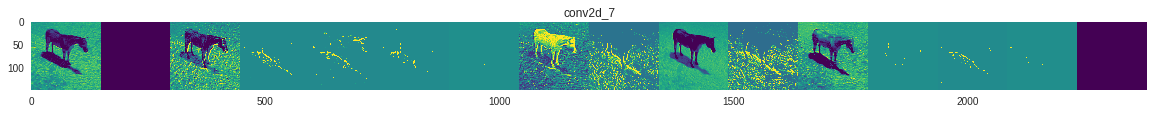

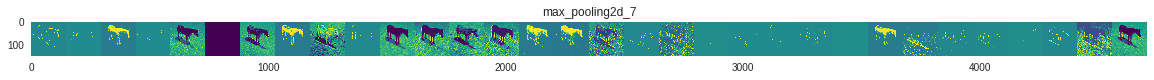

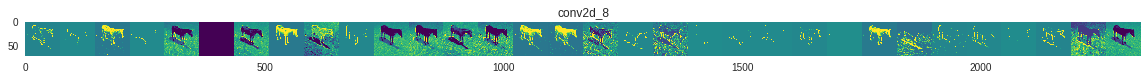

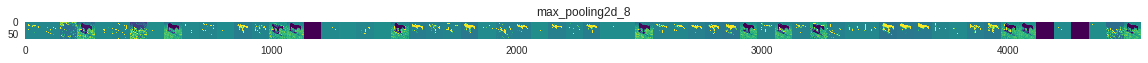

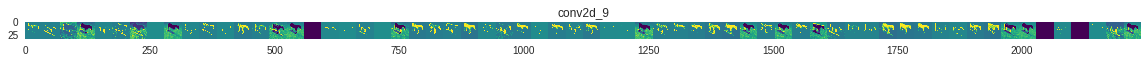

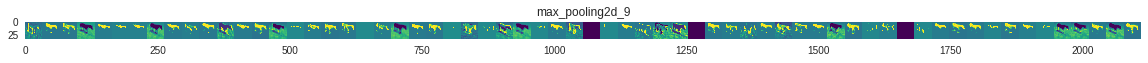

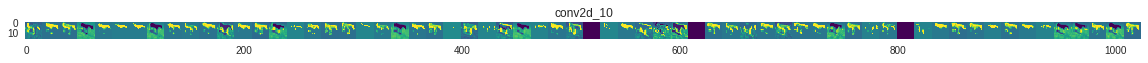

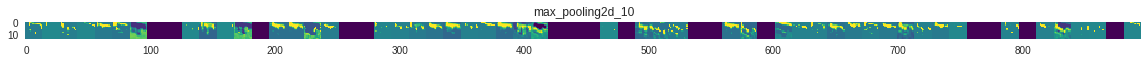

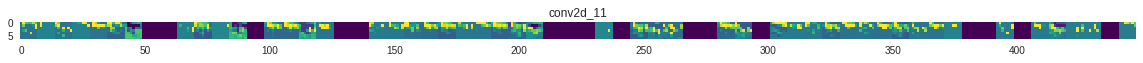

In [73]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [0]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)
# Before running the next exercise, run the following cell to terminate the kernel and free memory resources:

## Exercise

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2019-03-08 10:01:18--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.204.128, 2404:6800:4008:c00::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M  35.6MB/s    in 4.0s    

2019-03-08 10:01:27 (35.6 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip


--2019-03-08 10:01:30--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.97.128, 2404:6800:4008:c04::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.97.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘/tmp/validation-horse-or-human.zip’

/tmp/validation-hor 100%[===================>]  10.95M  48.2MB/s    in 0.2s    

2019-03-08 10:01:31 (48.2 MB/s) - ‘/tmp/validation-horse-or-human.zip’ saved [11480187/11480187]



In [0]:
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

In [0]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

# Directory with our training horse pictures
validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')

# Directory with our training human pictures
validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

In [5]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

validation_horse_names = os.listdir(validation_horse_dir)
print(validation_horse_names[:10])

validation_human_names = os.listdir(validation_human_dir)
print(validation_human_names[:10])

['horse28-9.png', 'horse04-7.png', 'horse11-3.png', 'horse03-0.png', 'horse02-3.png', 'horse12-2.png', 'horse40-1.png', 'horse23-5.png', 'horse27-4.png', 'horse33-9.png']
['human02-06.png', 'human13-21.png', 'human05-07.png', 'human05-14.png', 'human15-17.png', 'human09-18.png', 'human05-20.png', 'human14-24.png', 'human03-15.png', 'human10-11.png']
['horse4-439.png', 'horse3-026.png', 'horse4-345.png', 'horse1-510.png', 'horse6-403.png', 'horse5-550.png', 'horse5-259.png', 'horse1-105.png', 'horse2-224.png', 'horse4-495.png']
['valhuman03-21.png', 'valhuman01-24.png', 'valhuman02-04.png', 'valhuman04-20.png', 'valhuman03-18.png', 'valhuman03-13.png', 'valhuman01-14.png', 'valhuman02-08.png', 'valhuman04-17.png', 'valhuman05-05.png']


In [6]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))
print('total validation horse images:', len(os.listdir(validation_horse_dir)))
print('total validation human images:', len(os.listdir(validation_human_dir)))

total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

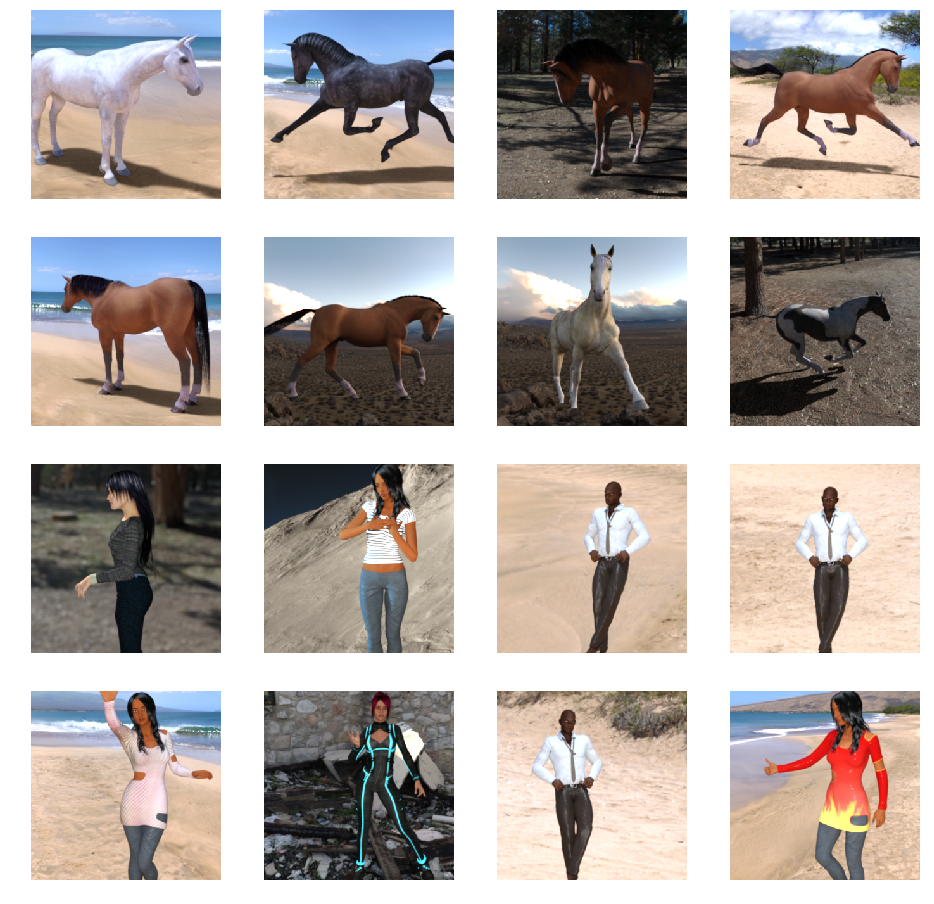

In [8]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

### Building a Small Model from Scratch

In [9]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()



Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv

In [0]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

### Data Preprocessing

In [11]:
# 数据预处理  data preprocessing: 把不同文件夹下的图片分别打上不同的标签labels
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/tmp/validation-horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


### Training

In [12]:
# training
history = model.fit_generator(
      train_generator,
      steps_per_epoch=8,  
      epochs=10,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
9/9 [==============================] - 11s 1s/step - loss: 0.9337 - acc: 0.4859 - val_loss: 0.6878 - val_acc: 0.5000
Epoch 2/10
9/9 [==============================] - 9s 976ms/step - loss: 0.9228 - acc: 0.6056 - val_loss: 0.6410 - val_acc: 0.7812
Epoch 3/10
9/9 [==============================] - 9s 947ms/step - loss: 0.5996 - acc: 0.7264 - val_loss: 0.3577 - val_acc: 0.8594
Epoch 4/10
9/9 [==============================] - 9s 979ms/step - loss: 0.5448 - acc: 0.7342 - val_loss: 0.3226 - val_acc: 0.8984
Epoch 5/10
9/9 [==============================] - 9s 968ms/step - loss: 0.5491 - acc: 0.8218 - val_loss: 0.4034 - val_acc: 0.8516
Epoch 6/10
9/9 [==============================] - 9s 961ms/step - loss: 0.3667 - acc: 0.8802 - val_loss: 2.9336 - val_acc: 0.7148
Epoch 7/10
9/9 [==============================] - 9s 966ms/step - loss: 0.2803 - acc: 0.9231 - val_loss: 1.0963 - val_acc: 0.8398
Epoch 8/10
9/9 [============================

### Running the Model

In [15]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

Saving imagess.jpeg to imagess.jpeg
[1.]
imagess.jpeg is a human


### Visualizing Intermediate Representations

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


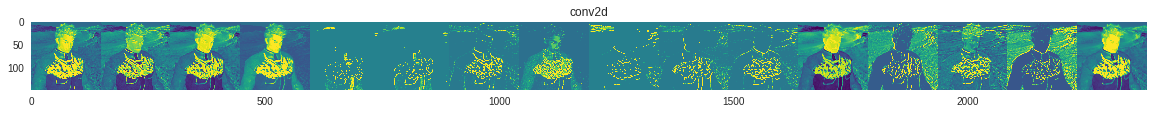

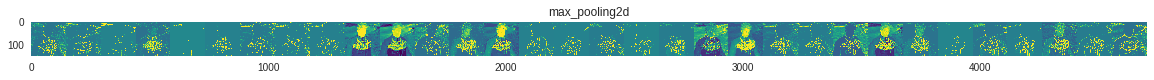

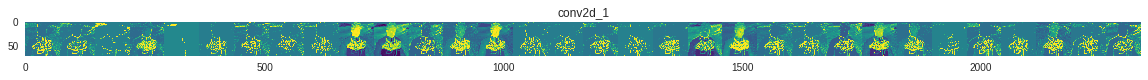

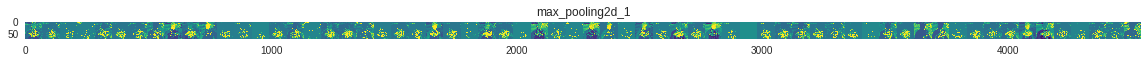

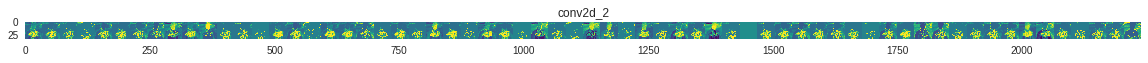

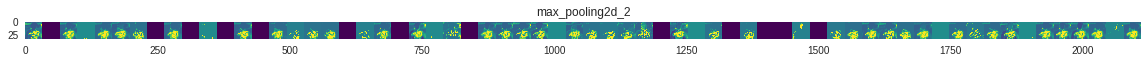

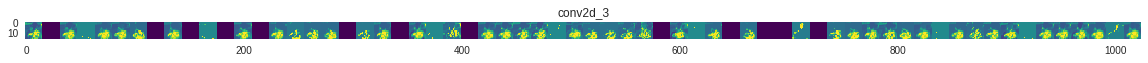

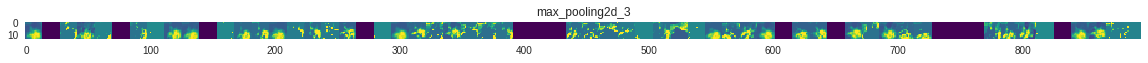

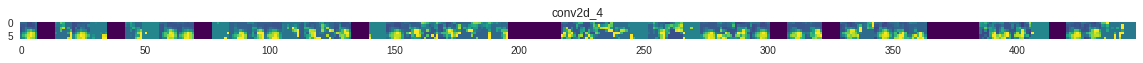

In [14]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

### Clean Up

In [0]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)

# Exercise 4

In [0]:
import tensorflow as tf
import os
import zipfile


DESIRED_ACCURACY = 0.999

!wget --no-check-certificate \
    "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip" \
    -O "/tmp/happy-or-sad.zip"

zip_ref = zipfile.ZipFile("/tmp/happy-or-sad.zip", 'r')
zip_ref.extractall("/tmp/h-or-s")
zip_ref.close()


# Your Code
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>DESIRED_ACCURACY):
      print("\nReached 99.9% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [0]:
# This Code Block should Define and Compile the Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),#？？？
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# model.summary()

from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [0]:
# This code block should create an instance of an ImageDataGenerator called train_datagen 
# And a train_generator by calling train_datagen.flow_from_directory

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
        '/tmp/h-or-s/',  
        target_size=(150, 150),  
        batch_size=10,#？？？
        class_mode='binary')

# Expected output: 'Found 80 images belonging to 2 classes'

In [0]:
# This code block should call model.fit_generator and train for
# a number of epochs. 
history = model.fit_generator(
    train_generator,
    steps_per_epoch=2,
    epochs=15,
    verbose=1,
    callbacks=[callbacks]
      )
    
# Expected output: "Reached 99.9% accuracy so cancelling training!""